# Evolutionary Dynamics: Moran Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

## Neutral Evolution

In [3]:
#  Neutral evolution

def neutral_evolution(N, i, tmax):

  #Tracking
  popA = [i] #popA.append(i)
  time = [0] #time.append(t)
  t = 0      #initial time

  #Simulation:
  while t < tmax:

    #calculating the probabilities 
    Pi_plus = (i/N)* ((N - i)/N)      #A reproduces and B dies
    Pi_minus = (i/N)* ((N - i)/N)     #B reproduces and A dies  
    Pi_stay = 1 - Pi_plus - Pi_minus  #A reproduces and dies or B reproduces and dies

    #Moran process:
    x = np.random.uniform()
    
    if (x < Pi_minus):
      i -= 1   #decrease in A pop
    
    elif (x < (Pi_minus + Pi_plus)):
      i += 1   #increase in A pop
    
    #else: #stay i = i 
    
    popA.append(i)
    t += 1
    time.append(t)
  
  return time, popA

### Simulation Moran process neutral evolution

Text(0.5, 1.0, 'Moran Process - Neutral Evolution; N = 1000')

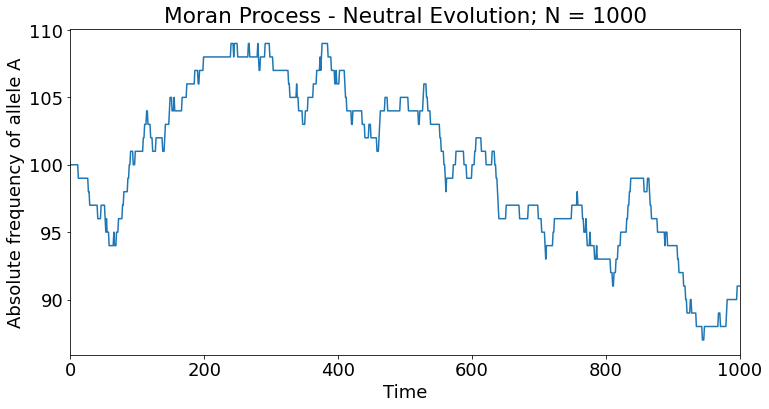

In [ ]:
#Parameters
N = 1000   #pop size
i = 100   #initial size of pop A
tmax = 1000 #number of interactions

#Simulation:
values = neutral_evolution(N, i, tmax)
time = values[0]
popA = values[1]

plt.plot(time, popA)
plt.xlim(0, tmax)
plt.xlabel('Time')
plt.ylabel('Absolute frequency of allele A')
plt.title('Moran Process - Neutral Evolution; N = 1000')

### Multiple runs: same initial values

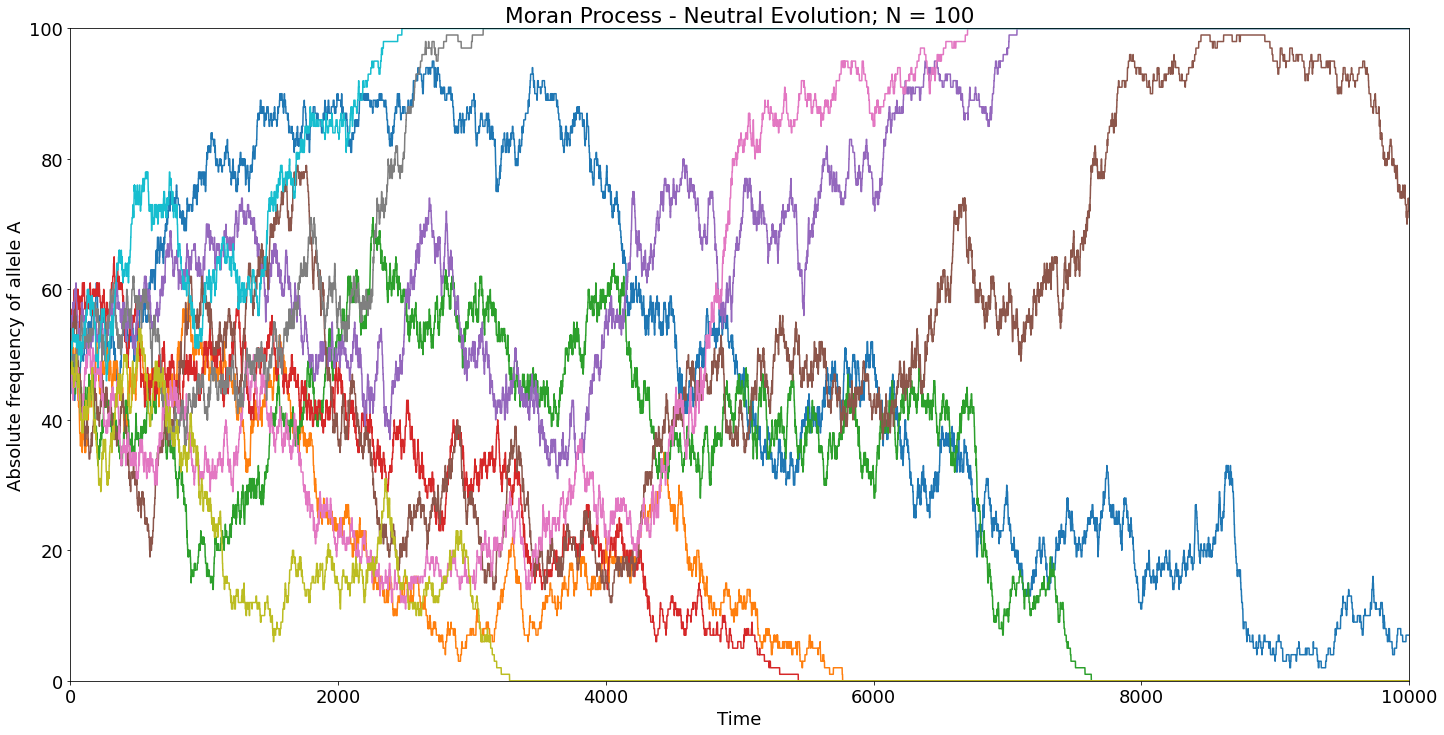

In [ ]:
# Multiple runs

#Parameters
N = 100   #pop size
i = 50   #initial size of pop A
tmax = 10000 #number of interactions

for j in range(10):
  values = neutral_evolution(N, i, tmax) #N, i, tmax
  time = values[0]
  popA = values[1]

  plt.plot(time, popA)

plt.xlim(0, tmax)
plt.xlabel('Time')
plt.ylabel('Absolute frequency of allele A')
plt.ylim(0, N)
plt.rcParams['figure.figsize'] = (32, 12)
plt.rcParams.update({'font.size': 18})
plt.title('Moran Process - Neutral Evolution; N = 100')
plt.savefig('moran-neutral-N100-i50.png')

In [ ]:
files.download('moran-neutral-N100-i50.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Probability of fixation for different i's

In [8]:
# Probability of fixation 

#Parameters
N = 100  #pop size
tmax = 10000 #number of interactions

#Probability of fixation: simulation (exp)
i = 0   #initial size of pop A
di = 10
i_sim = [] 
P_sim = []

n_runs = 100 #number of independent processes

while i <= N:
  i_sim.append(i)

  fixation = 0

  for j in range(n_runs):
    values = neutral_evolution(N, i, tmax) #N, i, tmax
    time = values[0]
    popA = values[1]

    #count how many fixated:
    for a in popA:
      if (a == N):
        fixation += 1
        break
    
  #probability of fixation for this initial value of i:
  p_sim = fixation/n_runs
  P_sim.append(p_sim)

  i += di


#Probability of fixation: theorical
i = []
P = []

for j in range(N + 1):
  P.append(j/N)
  i.append(j)


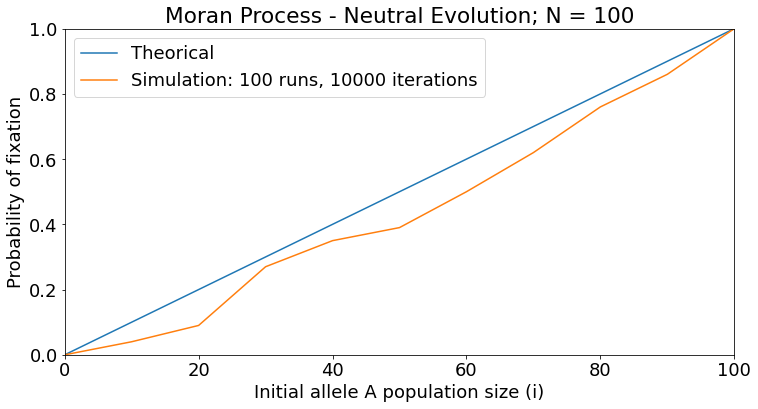

In [9]:
plt.plot(i, P)
plt.plot(i_sim, P_sim)
plt.xlim(0, N)
plt.xlabel('Initial allele A population size (i)')
plt.ylabel('Probability of fixation')
plt.ylim(0, 1)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams.update({'font.size': 18})
plt.title('Moran Process - Neutral Evolution; N = 100')
plt.legend(['Theorical', 'Simulation: 100 runs, 10000 iterations'])
plt.savefig('moran-neutral-N100-Pfixation-Py.png')

plt.show()

In [29]:
files.download('moran-neutral-N100-Pfixation-Py.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>